## Loading and displaying some visibilities

In [1]:
%load_ext autoreload
import sys
sys.path.append("..")
import imcurio as imc
import matplotlib.pyplot as plt

In [2]:
%autoreload
B = imc.SimBox("../sims/HImesh_0512_z100.fits")
Bf = imc.SimBox("../sims/Sky_0512_z100_060.0-30.0.fits", conversions_from = B)

Box size: 32.81-20.88 deg from z=0.72-1.33


In [3]:
%autoreload
T=imc.TelSim()
vis = T.get_visibilities(B)
visf = T.get_visibilities(Bf)


Beam sigma: 1.89-2.56 deg from z=0.72-1.33
Beam sigma at the edge: 8.67 - 4.07 
Beam sigma: 1.89-2.56 deg from z=0.72-1.33
Beam sigma at the edge: 8.67 - 4.07 


Text(0.5, 0, 'baseline number')

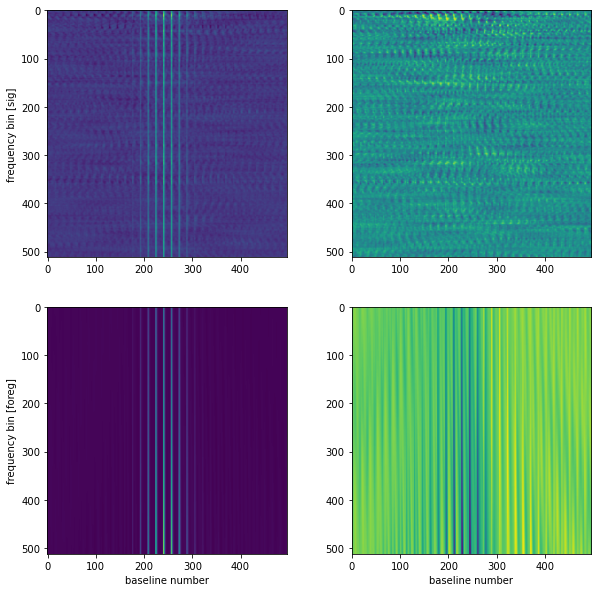

In [16]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1); plt.imshow(np.real(vis))
plt.ylabel('frequency bin [sig]')
plt.subplot(2,2,2); plt.imshow(np.imag(vis))
plt.subplot(2,2,3); plt.imshow(np.real(visf))
plt.ylabel('frequency bin [foreg]')
plt.xlabel('baseline number')
plt.subplot(2,2,4); plt.imshow(np.imag(visf))
plt.xlabel('baseline number')


/home/anze/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/anze/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


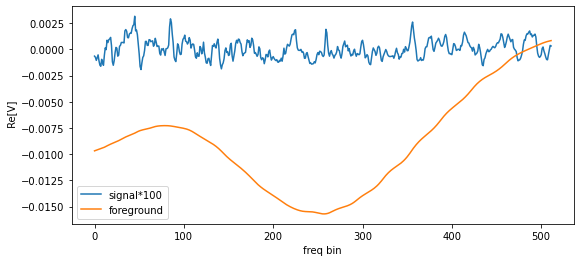

In [17]:
plt.figure(figsize=(9,4))
plt.plot(vis[:,440]*100,label='signal*100')
plt.plot(visf[:,440],label='foreground')
plt.xlabel('freq bin')
plt.ylabel(' Re[V]')
plt.legend()

In [6]:
%autoreload
UV_m=T.u_m[400],T.v_m[400]
print ("Looking at baseline ", UV_m)
visfpN = T.get_visibilities(Bf, pad = None, uv_m=UV_m, verbose = True)
visfp4 = T.get_visibilities(Bf, pad = 4, uv_m=UV_m, verbose = True)

Looking at baseline  (10, 0)
Beam sigma: 1.89-2.56 deg from z=0.72-1.33
Beam sigma at the edge: 8.67 - 4.07 
Beam sigma: 1.89-2.56 deg from z=0.72-1.33
Beam sigma at the edge: 8.67 - 4.07 


/home/anze/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/anze/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/anze/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


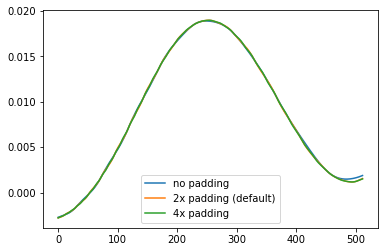

In [7]:
plt.plot(visfpN[:,0],label='no padding')
plt.plot(visf[:,400], label = '2x padding (default)')
plt.plot(visfp4[:,0], label = '4x padding')
plt.legend()